D:\Users\rajes\anaconda3\envs\QCML-IITD\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch 0, Cost: 0.2
Epoch 10, Cost: 0.2
Epoch 20, Cost: 0.2
Epoch 30, Cost: 0.2
Epoch 40, Cost: 0.2
Epoch 50, Cost: 0.2
Epoch 60, Cost: 0.2
Epoch 70, Cost: 0.2
Epoch 80, Cost: 0.2
Epoch 90, Cost: 0.2
Epoch 100, Cost: 0.2
Epoch 110, Cost: 0.2
Predictions: [0 0 0 0 0 0 0 0 0 0]
True Labels: [0 1 0 0 0 1 0 0 0 0]


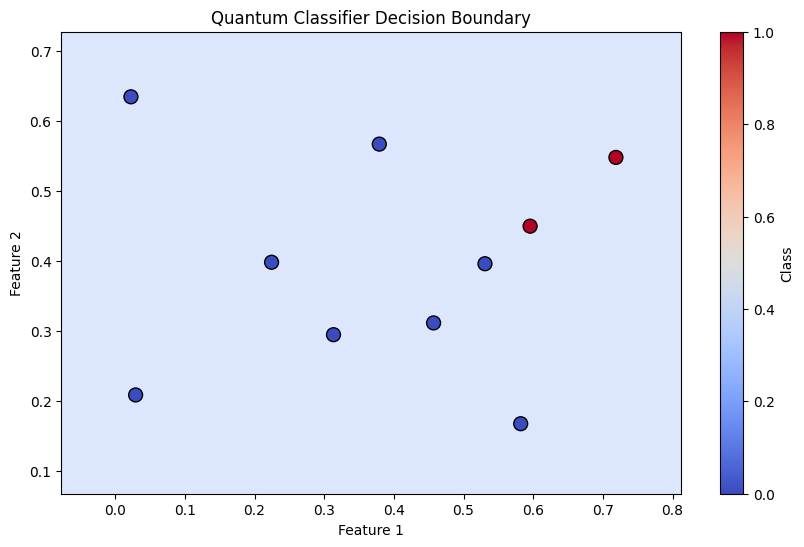

0: ─╭AngleEmbedding(M0)─╭BasicEntanglerLayers(M1)─┤  <Z>
1: ─╰AngleEmbedding(M0)─╰BasicEntanglerLayers(M1)─┤     

M0 = 
[0.37909853 0.56709817]
M1 = 
[[ 0.75084566 -3.12934988]
 [-2.91747163 -0.77415407]
 [-1.78163217 -0.59787346]]


In [1]:
import pennylane as qml
import numpy as np
from pennylane import numpy as pnp
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt

# Define the quantum device
dev = qml.device('default.qubit', wires=2)

# Define the quantum circuit
@qml.qnode(dev)
def circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=[0, 1])
    qml.templates.BasicEntanglerLayers(params, wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Define the cost function
def cost(params, x, y):
    predictions = np.array([circuit(params, xi) for xi in x])
    predictions = (predictions > 0).astype(int)
    return np.mean(predictions != y)

# Generate dummy data
np.random.seed(64)
X = np.random.rand(10, 2)  # 10 samples with 2 features each
Y = (np.sum(X, axis=1) > 1).astype(int)  # Binary labels based on the sum of features

# Initialize parameters and optimizer
params = pnp.random.uniform(-np.pi, np.pi, (3, 2))  # 3 layers, 2 qubits
optimizer = AdamOptimizer(0.1)

# Train the model
for epoch in range(120):
    params, cost_val = optimizer.step_and_cost(lambda p: cost(p, X, Y), params)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost_val}")

# Define prediction function
def predict(x, params):
    pred_probs = np.array([circuit(params, xi) for xi in x])
    return (pred_probs > 0).astype(int)

# Make predictions on the training data
predictions = predict(X, params)

# Print predictions and true labels
print("Predictions:", predictions)
print("True Labels:", Y)

# Plot the decision boundary
def plot_decision_boundary(pred_func, X, Y, title="Decision Boundary"):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()], params)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='coolwarm', marker='o', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(predict, X, Y, title="Quantum Classifier Decision Boundary")

# Draw the quantum circuit
import matplotlib.pyplot as plt
from pennylane import draw

# Drawing the circuit
def draw_circuit(params):
    qml.drawer.use_style("pennylane")
    return qml.draw(circuit)(params, X[0])  # Drawing for the first sample in X

# Plot the circuit
circuit_diagram = draw_circuit(params)
print(circuit_diagram)